In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib.animation import FuncAnimation

# 1.rendering & visiualization

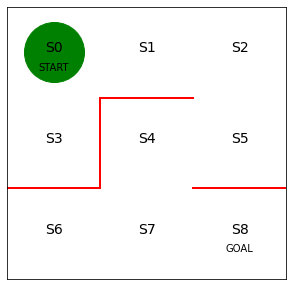

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca() #gca就是get current axes，获取当前坐标轴位置并移动
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# plt.plot([1, 1], [0, 1], color='red', linewidth=2)
# plt.plot([1, 2], [2, 2], color='red', linewidth=2)
# plt.plot([2, 2], [2, 1], color='red', linewidth=2)
# plt.plot([2, 3], [1, 1], color='red', linewidth=2)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# plt.axis('off')
plt.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                right=False, left=False,
                labelbottom=False, labelleft=False
               ) #关闭刻度标记
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

# 2. agent action policy

In [3]:
# border & barrier
import numpy as np
theta_0 = np.asarray([[np.nan, 1, 1, np.nan],      # s0可选择的方向
                      [np.nan, 1, np.nan, 1],      # s1
                      [np.nan, np.nan, 1, 1],      # s2
                      [1, np.nan, np.nan, np.nan], # s3 
                      [np.nan, 1, 1, np.nan],      # s4
                      [1, np.nan, np.nan, 1],      # s5
                      [np.nan, 1, np.nan, np.nan], # s6 
                      [1, 1, np.nan, 1]]           # s7
                     )
#每一行代表一个状态，每一列的索引代表动作
#这里动作就限制了不可走的方向(不会撞墙)
#s8是终止，所以不展示

In [4]:
#求动作概率
def cvt_theta_0_to_pi(theta):  
    m, n = theta.shape  #初始化pi
    pi = np.zeros((m, n))
    for r in range(m):
        pi[r, :] = theta[r, :] / np.nansum(theta[r, :])
    return np.nan_to_num(pi) #将nan转为0

In [5]:
pi = cvt_theta_0_to_pi(theta_0)
pi

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333]])

In [6]:
#数字化动作  这里定义列表actions为了下面action的运用
actions = list(range(4))
actions

[0, 1, 2, 3]

In [7]:
#只有动作，状态，还没包含转移概率，回报等
def step(state, action):
    if action == 0:
        state -= 3 #数字几即代表状态几，如1即s1
    elif action == 1:
        state += 1
    elif action == 2:
        state += 3
    elif action == 3:
        state -= 1
    return state

In [8]:
state = 0 #初始状态s0
action_history = []  #初始采取的动作列表
state_history = [state] #初始走过状态列表
while True: #直接进入循环，直至循环中运行break
    action = np.random.choice(actions, p=pi[state, :]) #在actions[0,1,2,3]里以概率选择action
    state = step(state, action) #调用step函数，返回新的状态
    action_history.append(action)
    if state == 8:
        state_history.append(8)
        break
    state_history.append(state)
len(action_history)

34

In [9]:
action_history

[2,
 0,
 1,
 3,
 2,
 0,
 1,
 3,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 3,
 3,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 3,
 2,
 3,
 1,
 1]

In [10]:
state_history

[0,
 3,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 1,
 2,
 5,
 2,
 5,
 2,
 5,
 4,
 5,
 2,
 1,
 0,
 3,
 0,
 1,
 2,
 5,
 2,
 5,
 4,
 7,
 6,
 7,
 8]

In [11]:
from IPython.display import HTML

In [12]:
def init():
    line.set_data([], [])
    return (line, )
def animate(i):
    state = state_history[i]
    x = (state % 3)+0.5 #状态依据x取格子中心
    y = 2.5 - int(state/3)
    line.set_data(x, y)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

In [14]:
HTML(anim.to_jshtml())